In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

file_to_load = "table2_food_pop_edu_income2.csv"

df = pd.read_csv(file_to_load)
df.head()

,number_of_fastfood,zipcode,population,state,county,graduate_or_professional,highSchool_or_higher,bachelors_or_higher,median,stdev,lat,lon,clean_mean
0,2,1020,30629.0,MA,Hampden County,6.1,87.9,16.2,57298.5,40508.00,42.1730,-72.5854,63987.5
1,1,1027,17872.0,MA,Hampshire County,12.8,95.2,35.5,190748.5,66716.50,42.2600,-72.6939,93036.5
2,1,1040,40280.0,MA,Hampden County,9.4,79.0,24.1,79691.5,44096.83,42.2047,-72.6244,55908.5
3,1,1060,15407.0,MA,Hampshire County,34.5,95.4,61.8,300000.0,59449.00,42.3091,-72.6678,85456.0
4,1,1104,23183.0,MA,Hampden County,4.7,74.7,12.7,34320.5,37990.00,42.1261,-72.5829,42570.5


In [107]:
# how many zipcodes have the same number of the fastfoodreastaurants
ffr = df["number_of_fastfood"].value_counts()

# store the value into dataframe
ffr_df1 = pd.DataFrame(ffr)
ffr_df1["number of ffr"] = ffr_df1.index
ffr_df2 = ffr_df1.reset_index(drop = True)
ffr_df3 = ffr_df2.rename(columns = {"number_of_fastfood":"number_of_zipcode"})
ffr_df3

,number_of_zipcode,number of ffr
0,2487,1
1,1041,2
2,448,3
3,221,4
4,123,5
5,70,6
6,49,7
7,26,8
8,16,9
9,13,10


In [108]:
pop_min = []
inc_min = []
edu_min = []

pop_max = []
inc_max = []
edu_max = []

for i in ffr_df3["number of ffr"]:
    df_df = df.loc[df["number_of_fastfood"] == i]
    pop_min_i = df_df["population"].min()
    inc_min_i = df_df["clean_mean"].min()
    edu_min_i = df_df["bachelors_or_higher"].min()
    
    pop_max_i = df_df["population"].max()
    inc_max_i = df_df["clean_mean"].max()
    edu_max_i = df_df["bachelors_or_higher"].max()
    
    pop_min.append(pop_min_i)
    inc_min.append(inc_min_i)
    edu_min.append(edu_min_i)
    
    pop_max.append(pop_max_i)
    inc_max.append(inc_max_i)
    edu_max.append(edu_max_i)
    
ffr_df3["population_min"] = pop_min
ffr_df3["income_min"] = inc_min
ffr_df3["bachelor_min"] = edu_min

ffr_df3["population_max"] = pop_max
ffr_df3["income_max"] = inc_max
ffr_df3["bachelor_max"] = edu_max
ffr_df3.head()

,number_of_zipcode,number of ffr,population_min,income_min,bachelor_min,population_max,income_max,bachelor_max
0,2487,1,101.0,13375.0,2.5,113255.0,203870.0,89.6
1,1041,2,763.0,19581.0,4.0,112317.0,190865.0,81.2
2,448,3,5838.0,19988.0,3.5,100049.0,161589.5,86.9
3,221,4,6418.0,24438.5,5.5,90512.0,150053.0,69.7
4,123,5,8657.0,28928.0,8.9,95808.0,111841.0,59.5


In [110]:
ffr_df4 = ffr_df3.loc[ffr_df3["number_of_zipcode"]>1]
ffr_df5 = ffr_df3.loc[ffr_df3["number_of_zipcode"] == 1]

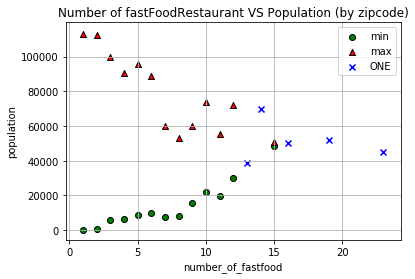

In [119]:
# plot the fastFoodRestaurant
plt.scatter(ffr_df4["number of ffr"], ffr_df4["population_min"], edgecolor="black", label = "min", c = "green", marker="o")
plt.scatter(ffr_df4["number of ffr"], ffr_df4["population_max"], edgecolor="black", label = "max", c = "red", marker="^")
plt.scatter(ffr_df5["number of ffr"], ffr_df5["population_max"], edgecolor="black", label = "ONE", c = "blue", marker="x")

plt.legend(loc = "upper right")
plt.title("Number of fastFoodRestaurant VS Population (by zipcode)")
plt.xlabel("number_of_fastfood")
plt.ylabel("population")
plt.grid(True)
plt.savefig("pics/population_min_max.png")
plt.show()

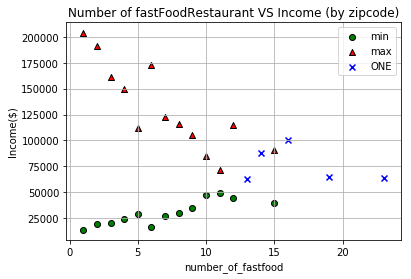

In [120]:
# plot the fastFoodRestaurant
plt.scatter(ffr_df4["number of ffr"], ffr_df4["income_min"], edgecolor="black", label = "min", c = "green", marker="o")
plt.scatter(ffr_df4["number of ffr"], ffr_df4["income_max"], edgecolor="black", label = "max", c = "red", marker="^")
plt.scatter(ffr_df5["number of ffr"], ffr_df5["income_max"], edgecolor="black", label = "ONE", c = "blue", marker="x")

plt.legend(loc = "upper right")
plt.title("Number of fastFoodRestaurant VS Income (by zipcode)")
plt.xlabel("number_of_fastfood")
plt.ylabel("Income($)")
plt.grid(True)
plt.savefig("pics/income_min-max.png")
plt.show()

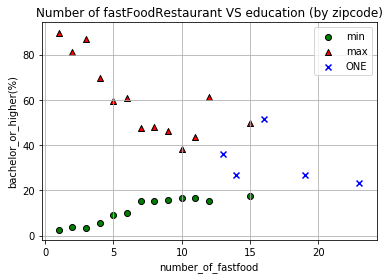

In [121]:
# plot the fastFoodRestaurant
plt.scatter(ffr_df4["number of ffr"], ffr_df4["bachelor_min"], edgecolor="black", label = "min", c = "green", marker="o")
plt.scatter(ffr_df4["number of ffr"], ffr_df4["bachelor_max"], edgecolor="black", label = "max", c = "red", marker="^")
plt.scatter(ffr_df5["number of ffr"], ffr_df5["bachelor_max"], edgecolor="black", label = "ONE", c = "blue", marker="x")

plt.legend(loc = "upper right")
plt.title("Number of fastFoodRestaurant VS education (by zipcode)")
plt.xlabel("number_of_fastfood")
plt.ylabel("bachelor_or_higher(%)")
plt.grid(True)
plt.savefig("pics/education_min_max.png")
plt.show()

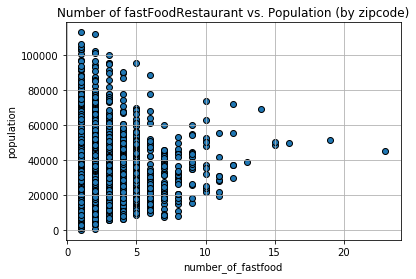

In [122]:
# plot the fastFoodRestaurant
plt.scatter(df["number_of_fastfood"], df["population"], edgecolor="black", marker="o")

plt.title("Number of fastFoodRestaurant vs. Population (by zipcode)")
plt.xlabel("number_of_fastfood")
plt.ylabel("population")
plt.grid(True)
plt.savefig("pics/population.png")
plt.show()

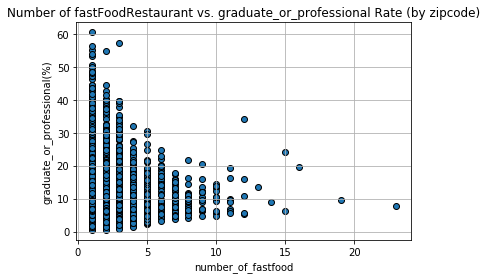

In [123]:
# plot the fastFoodRestaurant
plt.scatter(df["number_of_fastfood"], df["graduate_or_professional"], edgecolor="black", marker="o")

plt.title("Number of fastFoodRestaurant vs. graduate_or_professional Rate (by zipcode)")
plt.xlabel("number_of_fastfood")
plt.ylabel("graduate_or_professional(%)")
plt.grid(True)
plt.savefig("pics/graduate_or_professional.png")
plt.show()

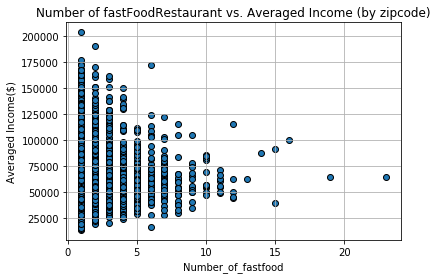

In [124]:
# plot the fastFoodRestaurant
plt.scatter(df["number_of_fastfood"], df["clean_mean"], edgecolor="black", marker="o")

plt.title("Number of fastFoodRestaurant vs. Averaged Income (by zipcode)")
plt.xlabel("Number_of_fastfood")
plt.ylabel("Averaged Income($)")
plt.grid(True)
plt.savefig("pics/Averaged_income.png")
plt.show()

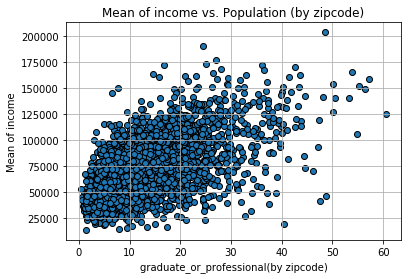

In [125]:
# plot the fastFoodRestaurant
plt.scatter(df["graduate_or_professional"], df["clean_mean"], edgecolor="black", marker="o")

plt.title("Mean of income vs. Population (by zipcode)")
plt.xlabel("graduate_or_professional(by zipcode)")
plt.ylabel("Mean of income")
plt.savefig("pics/graduate_professional.png")
plt.grid(True)

plt.show()